In [1]:
%%capture
!pip install mplhep --user

In [1]:
import numpy as np
import mplhep as hep
import ipywidgets as widget
import config, tools, plotting
import os, sys
import ROOT

Welcome to JupyROOT 6.24/06


In [26]:
filenames = [
    "TTToSemiLepton_HT500Njet9_UL2017_1.root",
    "TTToSemiLepton_HT500Njet9_UL2017_2.root"
    #"TTToSemiLeptonic_UL2017.root"
]
lumitext = "SemiLepton HT500Njet9"
year = "UL 2017"

rFiles = { filename: ROOT.TFile.Open( filename ) for filename in filenames }
rTrees = { filename: rFiles[ filename ].Get( "btagana" ).Get( "ttree" ) for filename in filenames }

savedir = "./{}_UL{}".format( lumitext, year )
if not os.path.exists( savedir ):
    os.mkdir( savedir )

In [27]:
btagger_ = widget.Dropdown( options = config.wp.keys(), value = "deepJet" )
btagger_

Dropdown(index=1, options=('deepCSV', 'deepJet'), value='deepJet')

In [28]:
wp_ = widget.Dropdown( options = config.wp[ btagger_.value ].keys(), value = "MEDIUM" )
wp_

Dropdown(index=1, options=('LOOSE', 'MEDIUM', 'TIGHT'), value='MEDIUM')

In [29]:
variable = widget.Dropdown( options = [ "nJ", "nB", "dz" ] )
variable

Dropdown(options=('nJ', 'nB', 'dz'), value='nJ')

In [37]:
edges = {
    "nJ": np.linspace(7,13,7),
    "nB": np.linspace(0,4,5),
    "dz": np.linspace(0,0.005,6)
}

hist_1D = tools.get_PVRecoAcc_1D( rTrees, variable.value, edges[ variable.value ], btagger_.value, wp_.value )

100%|██████████| 55451/55451 [00:05<00:00, 9412.95it/s] 


/eos/home-d/dali/BTV/PVReco_UL/plotting.py:218: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots[1].set_xticklabels( xticklabels )
/eos/home-d/dali/BTV/PVReco_UL/plotting.py:236: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels( xticklabels )
/eos/home-d/dali/BTV/PVReco_UL/plotting.py:241: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


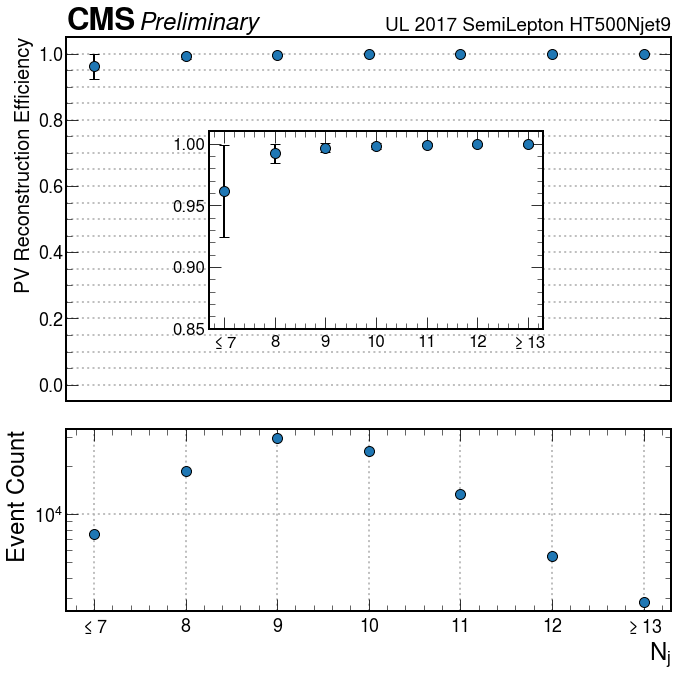

In [38]:
plotting.plot_PVRecoAcc_1D( 
    hist_1D, edges[ variable.value ], variable.value, 
    year, lumitext, btagger_.value, wp_.value,
    "{}/{}_RecoEff1D.png".format( savedir, variable.value )
)

In [39]:
x1 = widget.Dropdown( options = [ "nJ", "nB", "dz" ], value = "nJ" )
x1

Dropdown(options=('nJ', 'nB', 'dz'), value='nJ')

In [40]:
x2 = widget.Dropdown( options = [ "nJ", "nB", "dz" ], value = "nB" )
x2

Dropdown(index=1, options=('nJ', 'nB', 'dz'), value='nB')

In [47]:
hist_2D = tools.get_PVRecoAcc_2D( 
    rTrees, x1.value, x2.value, 
    edges[ x1.value ], edges[ x2.value ], 
    btagger_.value, wp_.value 
)

100%|██████████| 55451/55451 [00:29<00:00, 1862.58it/s]


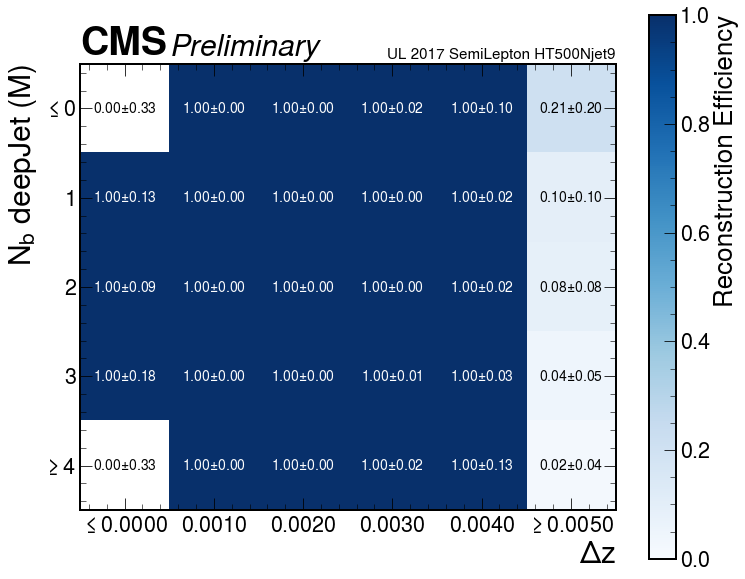

In [48]:
plotting.plot_PVRecoAcc_2D( 
    hist_2D, x1.value, x2.value, 
    edges[ x1.value ], edges[ x2.value ], 
    year, lumitext, btagger_.value, wp_.value,
    "{}/{}{}_RecoEff2D.png".format( savedir, x1.value, x2.value )
)

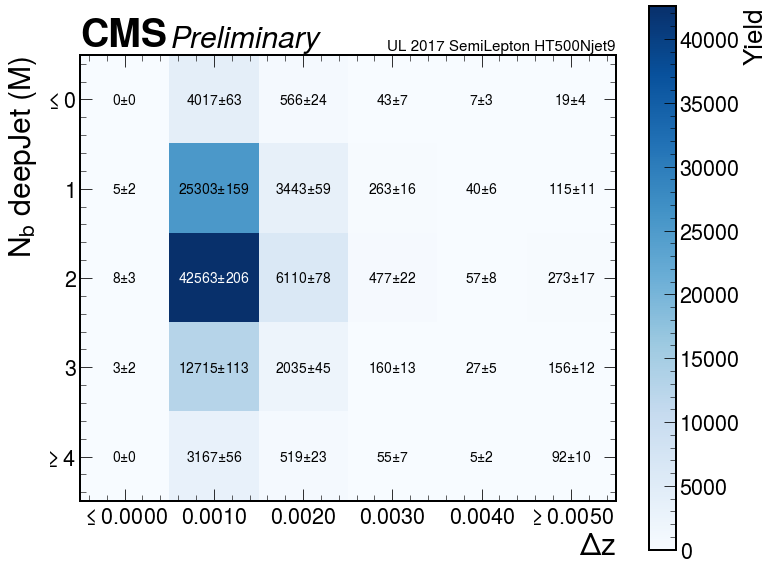

In [49]:
plotting.plot_yield_2D( 
    hist_2D, x1.value, x2.value, 
    edges[ x1.value ], edges[ x2.value ], 
    year, lumitext, btagger_.value, wp_.value,
    "{}/{}{}_Yield2D.png".format( savedir, x1.value, x2.value )
)